CO2 Emission data analysis - Source: https://rggi-coats.org
==============================
The purpose of this project was to scrap data from an EPA affiliated website and analyse the CO2 emissions in the North Eastern US. In order to do this, we had to scrap 2 tables (Emissions and Owners).

In [3]:
#Here we are importing the emissions data

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from datetime import date


sourceName = []   
state = []
oris = []
emissions = []  
opHours = []    
dateMonitor = []   
pageData = 0
maxPage = 0

while pageData <= maxPage:

    
    url = "https://rggi-coats.org/eats/rggi/index.cfm?hc=IiguXCAK"

    payload = {'fuseaction' : 'reportsV2.quarterly_emissions_rpt_output',
    'reporttype' : 'F',
    'FILTER_BEGINNING_YEAR' : '2009',
    'FILTER_ENDING_YEAR' : '2015',
    'FILTER_BEGINNING_QUARTER' : '1',
    'FILTER_ENDING_QUARTER' : '4',
    'SRC_NUMBER' : '',
    'SRC_NAME' : '',
    'REGION_ID' : '0',
    'page': pageData,
    'sourcesselected' : '',
    'returnfuseaction' : 'reportsv2.quarterly_emissions_rpt',
    'src_id' : 'TSlOP19UOlZTIyU9I19cTFJHPCs+XlAnIzJPWylULSc1M0xENl9KVl8jSlc/U1xQU1EgW1xeJFhVU10/LgpNVSBDK1FAWkpSIFwqU0U/NFpKRjMjIFssUVo7VzM6W1hKRVQhOi9fTVQsRSsiL18tXiheV0ssNT0hTFBfCk03TE05I0xWMyNYRylSRjMxK0A8KSFOVzVbTlM/JiRCN1U+PzVbL0ciVydXSlRPRzMrX1MuWC9RPlNPR18KTSpNX0VRPC8pXyhLMydAOyJbX10xN108NEBOXytLPDNOVjI/M1dHVC0gTSo/UyxfRlBOXzJXXFtfUFw3PgpNX00ySTVeLzBCL0ZKUjw4NzpNXCJbOldBU0FXKyUsQDspPT9fMiZTMlBAKyxKKk9XIz47WVJPPyJbOk5LCk1XLCtaVUVNSCIvTVJQRC8tSj0vNyJAVEIjVURRUi4zWCstSypTKCpPRDw/O19cKk4qXCszUl0yQ1JNO1UKTVlMXzdaKlA3UiJbLlk8NzUqRVdcXjxdNltcVC9UQlEyVURbN14kPD9RQT9dXl0vUFldOyhUQCQ6UiBcPgpNUCEnNlpKTEkzWUNCUlg0S0kgUzJQTkwlMTxXMlIgRU8hJDYzU19cK1M8XyUlXF8nID9ANSIgTytSITMyCk1ZLTMmXik7MV9EXT83Xls7VT48JyEvXypVX0cnJ1InVlsgM1tQXTciVV43IzFNTDEwTkdDUlBDQFlFMkwKTVhCRSc3PkwsQ0xTIV4gPy4hTCpTNUw7LkdcMlBYREU2USxbN1IgNC1BTE9fN1hbLlAgLDBFTF03KV5bQQpNX0pPP1EvWisjXC1fJ1hJMlosREtdJD0ySzxXIlZaMzsqQT5OSFAsV0FfW0lQVyc6UiBUKFoxWyNKXE9eCk0gJzAzWyBPIyhdOylfL189NyJQV1JcN0VTPSMwW0BbOV9dI1VfXTwgUU9YNUcuSzQnLjtQWyArKlpMRzUKTSVfWyJSIEgzUyxUOFVQOjtTTU8nV10hKldcRy8yTD81XkxLXSJNID8wRlsjWU4/Q1VaOzcrPzJVUkBfRgpNS1xNM1UvXCxXVEEzKywsN1ZVXCpCLEU8VjQnMldNVE4zPks/MkBcLV9MPScmR0xLJlI8OlFAW05VTFpRCk0yJ0UqX1wjOFldOy4gUD81Jy0/I1hQQCBTPD8qJV4/O19CXD5bXEspUVwrSiEyVzpRP10vUExdKTdBMk4KTVVGJFUgRVwiUSwwNTNHW15XXFIyUF9eLlsuS18gX1NaNzwmOSFCRzpTLEgxQ04vT1ddKDVfXVRPUTFVVQpNIF5LOCBMPz5bTDsuUy1TO1tMPC5TIFs/XkovKChcUz9BOD0jI1wrI1MgPy9fUl8nVVxVLjM8SzZQQlc9Ck1SIEtCQ1w8IjcqXFZSSjtOVT9PU1NNPCVVOlBWX09fLyUsLDNXTkcvUExIO1NYWyJRUjAlKSxcIkE6RzAKTVYsXE5RRkhTM1gsL1k8LzBXLE88M11AI1ZCVygpLDc+Xi1cKkFfLFJfPCs2WiVfVSNOO09bT1crUiJcLwpNUywrQFBPUyxbKlQjSEArPjRYICZbPDxPXl5HNks8XDQ7Xl8/UEhbPVJMPzVQXFIiITBfU1MgPShQRTg7Ck0iLFwoJyE7O1c8MjhRTiAzVV1dKCs9Tz9DTk0pK1BbOlMgUk9VMj5VMipcLUtMR0MhTV00Vy9cNSFKTCcKTVosIlMhTVc/RzxPUENcUzchUDAyU1xNIkctWlU1IFddUlVeVyMgXy9WQE06U0E7LlM+QzZeXC9MVDBHMQpNUEBfO0hRIz9TXlIlUixbQyM+Xz4gLDBbQE9SSVFQSz8xQFVbU0EvUlcvW0gkRD07QF1cPSIvSDJZXE0/Ck0gVEkyU1xPIyMoVUdXPEQqNlw1NyJNOyYxPSJQWFgrRlFOODkrPkw6UkxLU1NaVE8rPEdDU11PTyAsUyEKTStMKkxYUF8zUE1fIlQ8RiUrTFQuVzxAN0tcWy5eRUsyUEFLOVFQPD5VXUsjPixfMUNcXy1UIE8nXyE6TwpNUzY/U0tdP1lLPCdbM0FTN1UxSzJXQEQ+MFhfUyNAUyVeRDMrWi1bXidHRzZfRTs8VVRMM1ciL0hXWSoxCk0nJFI+QipbM0osVydaQSAqW01NXldeJyhDTD8pUj00IEJMXkpZLzdAX1g8JlNPOSMjJEQkPjxTVSE+RCQKTVBUMzJVPFcuUlA+PlFOWyIiXFdDU14tTCFYUzpTXEUrVi9FM1BOXEIjMCczM0xLX1VFPTcyLCstK0pbVQorUiQ7TSJMX1M+TTwpMz9cIAo='
    }

    #Request the data
    r = requests.post(url, payload)

    #save the data in a html
    with open("requests_results.html", "w") as f:

        f.write(r.content)

    #Open the data with beautiful
    plantData = BeautifulSoup(open('requests_results.html'))
    
    #Find how many pages there is
    maxPage = plantData.find_all('span', {'class': "fuse"})
    for tag in maxPage:
        maxPage = tag.find_all('b')
        for tag in maxPage:
            maxPage = tag.get_text()
    maxPage = float(maxPage[-8:-4]) // 100
    
    
    #Clean html
    plantData = plantData.find_all('tr', {'valign': "baseline"})

    lineData= 0
    for tag in plantData:
        plantData[lineData] = tag.find_all('td')
    
        columnData = 0
        for tag in plantData[lineData]:
            plantData[lineData][columnData] = tag.get_text().encode('ascii', 'ignore')
            columnData = columnData +1
    
        lineData = lineData +1


    #Organize the data
    for i in range (0,len(plantData)):
    
        #Emissions which we also transform to float
        if plantData[i][-4] == 'Not Operating' or plantData[i][-4] == 'No Data':
            emissions.append(0)
        else:
            emissions.append(float(plantData[i][-4].replace(",", "")))

        #opHours which we also transform to float
        if plantData[i][-6] == 'Not Operating' or plantData[i][-6] == 'No Data':
            opHours.append(0)
        else:
            opHours.append(float(plantData[i][-6].replace(",", "")))

        #dateMonitor which we also transform to date using year and quarter
        dateMonitor.append(date(int(plantData[i][0]),(int(plantData[i][1])-1)*3+1,1))

        #sourceName 
        sourceName.append(plantData[i][2])
        
        #state 
        state.append(plantData[i][5])
        
        #oris 
        oris.append(plantData[i][3])

 
    pageData = pageData + 1
            

plantSummary = pd.DataFrame({'Plant_Name': sourceName,
                            'Operating_Hours': opHours,
                            'State': state,
                             'Oris': oris,
                            'Emissions': emissions,
                            'Date_Monitor': dateMonitor})


plantSummary.head()


,Date_Monitor,Emissions,Operating_Hours,Oris,Plant_Name,State
0,2009-01-01,2574.935,89.10,544,Devon,CT
1,2009-04-01,589.222,24.69,544,Devon,CT
2,2009-07-01,1156.144,48.24,544,Devon,CT
3,2009-10-01,4496.612,158.34,544,Devon,CT
4,2010-01-01,2445.324,87.80,544,Devon,CT


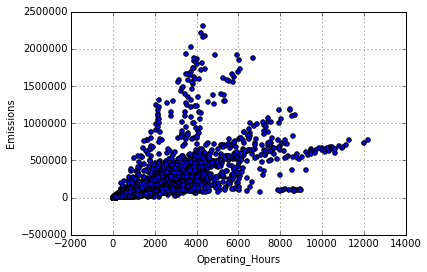

In [4]:
#Here we are doing a graph to start vizualising the data

import matplotlib.pyplot as plt
%matplotlib inline  
plantSummary.plot(kind = 'scatter', x = 'Operating_Hours', y = 'Emissions' )

*Analysis:*
---------
This first scatter plot shows what the amount of emissions rejected is per hour operated for different power plants.
Several linear regressions could be guessed from this plot. For example, we can imagine that the power plants that emit the most CO2 per hour operated are the Oil plants followed by Coal plants and the gas ones. 

In [8]:
plantSummary.groupby(plantSummary.State).sum().sort('Emissions',ascending=False)

,Emissions,Operating_Hours
State,,
NY,2.319458e+08,3067964.20
MD,1.530360e+08,767824.83
MA,9.692613e+07,859212.64
NJ (First Control Period Only),5.315729e+07,643226.59
CT,4.316551e+07,474416.03
NH,3.453993e+07,304834.44
DE,2.677397e+07,344459.01
RI,2.114301e+07,281850.88
ME,1.956083e+07,283441.64


In [9]:
plantSummary.groupby(plantSummary.State).sum().sort('Operating_Hours',ascending=False)

,Emissions,Operating_Hours
State,,
NY,2.319458e+08,3067964.20
MA,9.692613e+07,859212.64
MD,1.530360e+08,767824.83
NJ (First Control Period Only),5.315729e+07,643226.59
CT,4.316551e+07,474416.03
DE,2.677397e+07,344459.01
NH,3.453993e+07,304834.44
ME,1.956083e+07,283441.64
RI,2.114301e+07,281850.88


*Analysis:*
---------
NY is the state where the CO2 emissions is the highest. It si also the stae where operating hours is the highest.

In [10]:
#Here we are importing the owner data

stateAll = [2,4,5,6,7,8,9,11,12]
sourceNameOwner = []
orisOwner = []
ownerName = []
    
for state in stateAll:
    
    url = "https://rggi-coats.org/eats/rggi/index.cfm?hc=ISggICAK"

    payload = {'fuseaction' : 'reportsv2.owners_rpt',
    'expandFilter' : '1',
    'setFilter' : 'true',
    'PROG_ID' : state,
    }

    #Request the data
    r = requests.post(url, payload)

    #save the data in a html
    with open("owner_results.html", "w") as f:

        f.write(r.content)

    #Open the data with beautiful
    ownerData = BeautifulSoup(open('owner_results.html'))
    
    #Clean html
    ownerData = ownerData.find_all('tr', {'valign': "baseline"})

    lineData= 0
    for tag in ownerData:
        ownerData[lineData] = tag.find_all('td')
    
        columnData = 0
        for tag in ownerData[lineData]:
            ownerData[lineData][columnData] = tag.get_text().encode('ascii', 'ignore')
            columnData = columnData +1
    
        lineData = lineData +1

    
    #Organize the data
    for i in range (0,len(ownerData)):
    
        #sourceName 
        sourceNameOwner.append(ownerData[i][0])
        
        #Oris code
        orisOwner.append(ownerData[i][2])

        #Owner
        ownerName.append(ownerData[i][4])
        
ownerSummary = pd.DataFrame({'Source_Name_Owner': sourceNameOwner,
                            'Oris_Code_Owner': orisOwner,
                            'Name_Owner': ownerName,
                             })


ownerSummary.head()



,Name_Owner,Oris_Code_Owner,Source_Name_Owner
0,New York Power Authority (Owner-Operator),7910,23rd and 3rd
1,"AG Energy, LP (Owner-Operator)",10803,AG - Energy
2,Allegany Generating Station (Owner-Operator),10619,Allegany Station No. 133
3,"NRG Arthur Kill Operations, Inc. (Operator)\rA...",2490,Arthur Kill
4,"Astoria Energy, LLC (Owner)\rGDF Suez Energy, ...",55375,Astoria Energy


In [11]:
#Here we are merging the two last tables and droping some columns

owner_Emission_Summary = pd.merge(plantSummary, ownerSummary, how='inner', 
               left_on='Oris', right_on='Oris_Code_Owner')
owner_Emission_Summary = owner_Emission_Summary.drop(['Source_Name_Owner','Oris_Code_Owner'], axis=1) 

In [12]:
#The data looks clean!
owner_Emission_Summary.head()

,Date_Monitor,Emissions,Operating_Hours,Oris,Plant_Name,State,Name_Owner
0,2009-01-01,2574.935,89.10,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
1,2009-04-01,589.222,24.69,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
2,2009-07-01,1156.144,48.24,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
3,2009-10-01,4496.612,158.34,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."
4,2010-01-01,2445.324,87.80,544,Devon,CT,"NRG Devon Operations, Inc. (Operator)\rDevon P..."


In [29]:
data = owner_Emission_Summary.groupby(['year','Plant_Name','Name_Owner'])['Emissions'].sum()
data.sort('Emissions',ascending=False)
print data.head(10)
print "=================="
data = owner_Emission_Summary.groupby(['Name_Owner'])['Emissions'].sum()
data.sort('Emissions',ascending=False)
print data.head(10)

year  Plant_Name      Name_Owner                                     
2010  Morgantown      Genon Mid-Atlantic, LLC (Owner-Operator)           7969125.452
2011  Morgantown      Genon Mid-Atlantic, LLC (Owner-Operator)           6895629.344
2009  Brayton Point   Brayton Point Energy, LLC (Owner-Operator)         6879086.775
      Brandon Shores  Raven Power Fort Smallwood LLC (Owner-Operator)    6860722.390
2011  Brandon Shores  Raven Power Fort Smallwood LLC (Owner-Operator)    6610419.074
2010  Brayton Point   Brayton Point Energy, LLC (Owner-Operator)         6403811.775
2009  Morgantown      Genon Mid-Atlantic, LLC (Owner-Operator)           6382061.111
2010  Brandon Shores  Raven Power Fort Smallwood LLC (Owner-Operator)    6329727.781
2014  Morgantown      Genon Mid-Atlantic, LLC (Owner-Operator)           6192869.979
      Brandon Shores  Raven Power Fort Smallwood LLC (Owner-Operator)    5597267.314
Name: Emissions, dtype: float64
Name_Owner
Genon Mid-Atlantic, LLC (Owner-Operat

*Analysis:*
---------
This table shows us what power plants are the biggest emitters and which company operates them.
The 2nd table shows us which companies are the biggest emitter.

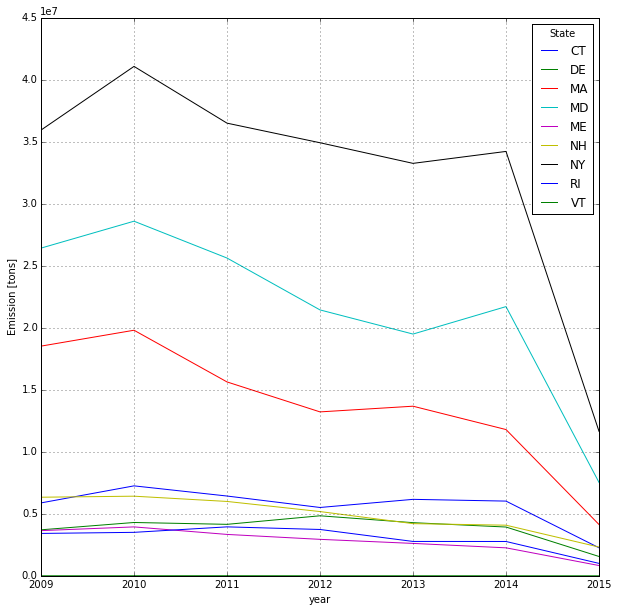

In [34]:
# Now that our entire dataset is ready we can make some more analysis
owner_Emission_Summary['year'] = [x.year for x in owner_Emission_Summary.Date_Monitor]
data = owner_Emission_Summary.groupby(['State','year'])['Emissions'].sum().unstack('State')
ax = data.plot(figsize=(10,10))
ax.set_xticklabels(list(data.index))
plt.ylabel('Emission [tons]')
plt.show()

*Analysis:*
----------
This historical plot shows us that emissions have been trending down in the past 7 years. (Note that 2015 data only includes Q1). 

In [30]:
owner_Emission_Summary['Efficiency']=owner_Emission_Summary['Emissions']/owner_Emission_Summary['Operating_Hours']

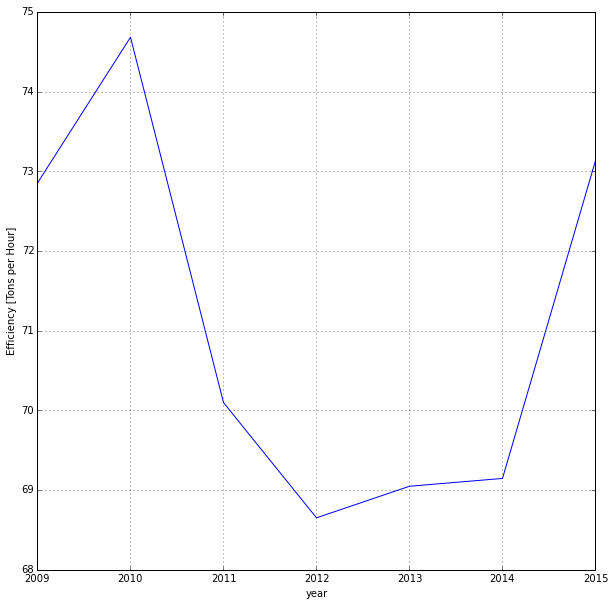

In [37]:
owner_Emission_Summary['year'] = [x.year for x in owner_Emission_Summary.Date_Monitor]
data = owner_Emission_Summary.groupby(['year'])['Efficiency'].mean()
ax = data.plot(figsize=(10,10))
ax.set_xticklabels(list(data.index))
plt.ylabel('Efficiency [Tons per Hour]')
plt.show()

*Analysis:*
----------
This plot show us that the efficiency has also improved (Note that 2015 again only includes Q1).

Conclusion:
=====
Emissions have been reducing and the efficiency has improved which is showing us that the RGGI market has been effective.